In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import my_utils as myf
import xesmf as xe
from matplotlib.gridspec import GridSpec

In [2]:
mydir = '/glade/work/lettier/archived_data/202212_data_paper_nudge_winds_amoc/atmvar_spg/'
myfiles = [mydir+f for f in sorted(os.listdir(mydir)) if '.nc' in f]
listds = []
for file in myfiles: 
    ds = xr.open_dataset(file)
    listds.append(ds)
ds = xr.concat(listds,dim='names')
lensmean = ds.sel(names=[f for f in ds.names.values if 'LENS' in f]).mean(dim='names')
lensmean['names'] = 'LENSmean'
lensmean = lensmean.set_coords('names')
ds = xr.concat([ds,lensmean],dim='names')

lineplotprop = myf.set_line_prop(ds.names.values)
ads = ds.groupby('time.year').mean(dim='time')
trend, intercept, _, pval, _ = myf.linregress(np.arange(len(ads.year)),ads,dim='year')

In [3]:
mynames = ['nudge_era_archi', 'nudge_era_arclo', 'nudge_era_high','anom_nudge_era','anom_nudge_era_high','anom_nudge_era_low']

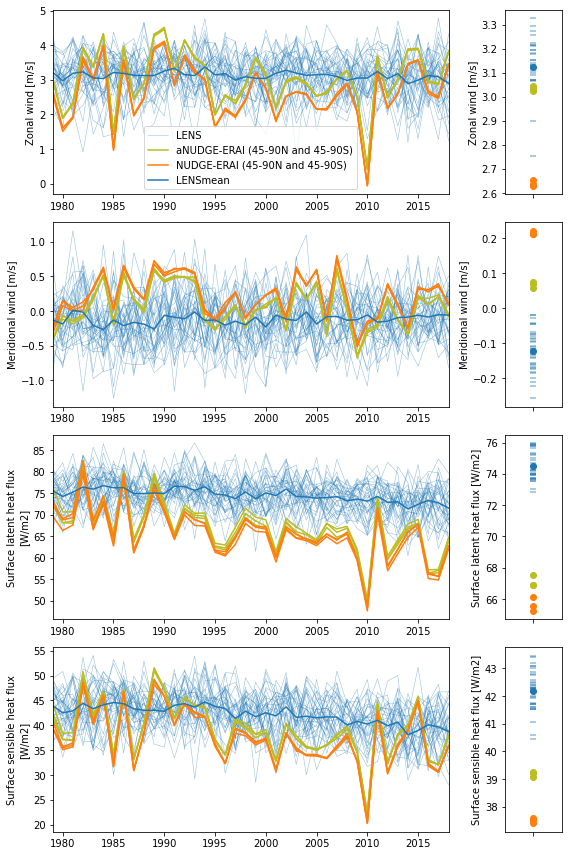

In [4]:
fig = plt.figure(figsize=(8,4*3))
spec = fig.add_gridspec(4, 5)

for v, var in enumerate(['U','V','LHFLX','SHFLX']):

    ax = fig.add_subplot(spec[v, :-1])
    for n, name in enumerate(ds.names.values):
        if 'LEN' in name or name in mynames:
            ads.isel(lev=0)[var].isel(region=0).sel(names=name).plot(ax=ax, **lineplotprop[name])
    ax.set_title('')
    if v==0:
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())
    ax.set_xlabel('')
    ax.set_xlim([1979,2018])
    
    ax = fig.add_subplot(spec[v, -1])
    for n, name in enumerate(ds.names.values):
        if 'LEN' in name or name in mynames:
            mk = 'o'
            if 'LENS' in name and 'mean' not in name:
                mk='_'
            ax.scatter(0,ads.isel(lev=0)[var].isel(region=0).sel(names=name).mean(dim='year'),c=lineplotprop[name]['c'],
                       alpha=lineplotprop[name]['alpha'],marker=mk)
    ax.set_title('')
    ax.set_xlabel('')
    ax.set_ylabel(ads[var].long_name+' ['+ads[var].units+']')
    ax.set_xticks([0])
    ax.set_xticklabels([''])

plt.tight_layout()
plt.show()
fig.savefig('figs/suppFig7.pdf',dpi=300,bbox_inches='tight')
plt.close()